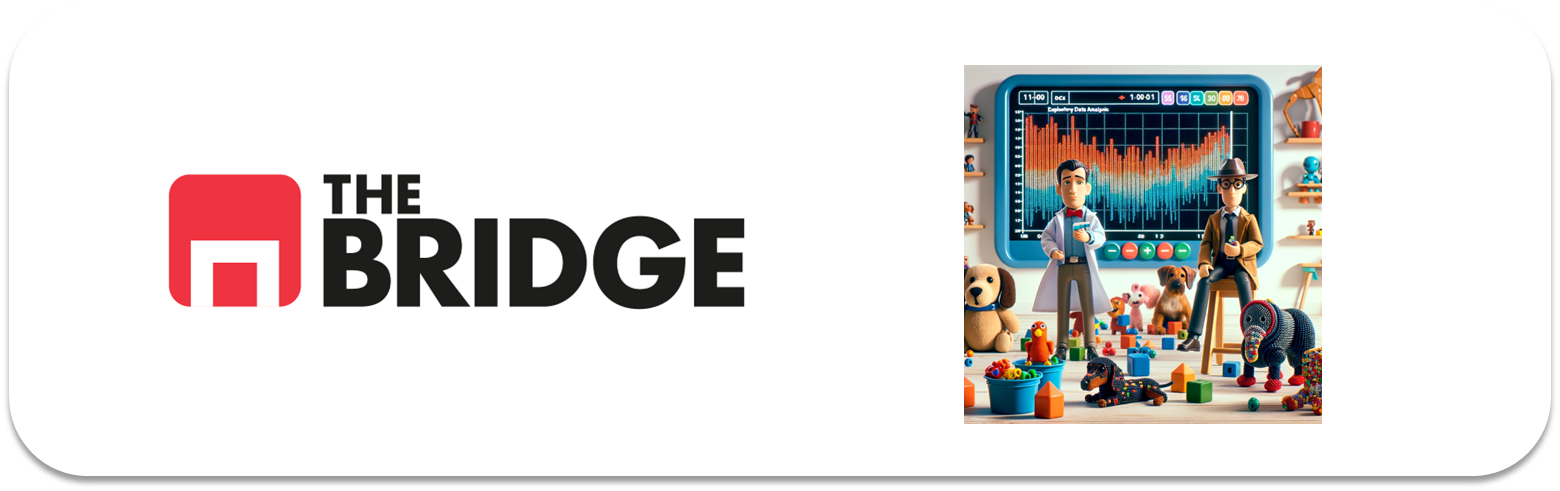

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

# Mini-guía para orientarnos

- **Objetivo:** Si lo tengo perfecto, si no -> lo busco
- **LIMPIAR/PREPARAR LOS DATOS**
- **Tabla de variables:** definiciones, tipificar, priorizar
- **Análisis Univariante:** Análisis visual y numérico  
  - Categóricas: Moda, Frecuencias Absolutas y Relativas  
  - Numéricas: Tendencia central (mediana, media), rangos, posición (percentiles-cuartiles, IQR, CV), distribución (histograma, densidad probabilidad)

- **Análisis Bivariante:** Análisis visual y numérico  
  - Categórica - Categórica: Chi-2  
    - Tablas de contingencia (solo para cat. con cardinalidad controlada)  
  - Categórica - Numérica:  
    - Categórica es binaria: Prueba U Mann-Whitney (t-student si dist. normal)  
    - Categórica no es binaria: ANOVA  
  - Numérica - Numérica: Correlación de Pearson (Prueba estadística)  
    - No hay correlación de Pearson para Categóricas  
    - Binarias tampoco es correcto Pearson  

- **Notas** con ideas, preguntas, cosas extraordinarias
- **Análisis Multivariante:** A ojo, "free style"
- **Haces retrospectiva** -> lista de verdades/hipótesis/preguntas/suposiciones/inquietudes  
  - Números
- **Respuestas:** MENSAJES  
  - Si no hay respuesta en los datos -> ok  
  - Si la respuesta es un número -> ok  
  - Si la respuesta es NO -> ok  


### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [ ]:
# No importo las otras librerias porque ya están importadas en bootcampviztools
# import pandas as pd
# import seaborn as sns
from bootcampviztools import *
from scipy import stats


## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"], inplace = True)
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns=["parch", "sibsp"], inplace=True)
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
moda_embark_town = df_titanic["embark_town"].mode()[0]
print("La moda es: ", moda_embark_town)
df_titanic["embark_town"].fillna(moda_embark_town, inplace=True)
df_titanic.head()

La moda es:  Southampton


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [ ]:
df_titanic[['age', 'who']].isna().sum()

age    177
who      0
dtype: int64

In [9]:
print("Las medias según el tipo de persona son las siguientes:\n")
print(df_titanic.groupby('who')['age'].mean())

Las medias según el tipo de persona son las siguientes:

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64


In [10]:
df_titanic['age'] = df_titanic.groupby('who')['age'].transform(
    lambda s: s.fillna(s.mean())
)

In [11]:
df_titanic['age'].isna().sum()

np.int64(0)

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

**1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?**

En términos absolutos sobrevivieron más mujeres, luego hombres y por último niños. En términos relativos sobreviven más mujeres, luego niños y luego hombres. Esta diferencia entre términos absolutos y relativos es muy probablemente por la cantidad de hombres y mujeres en el dataset con respecto a los niños. En términos relativos vemos que mujeres y niños sobreviven más que los hombres, muy probablemente por la norma de que se salven mujeres y niños primero.

El sexo y la supervivencia tienen una relación altísima, siendo estadísticamente significativo (p = 0.00).

El ser adulto o niño y la supervivencia tienen una relación también muy alta, siendo estadísticamente significativo (p = 0.00).

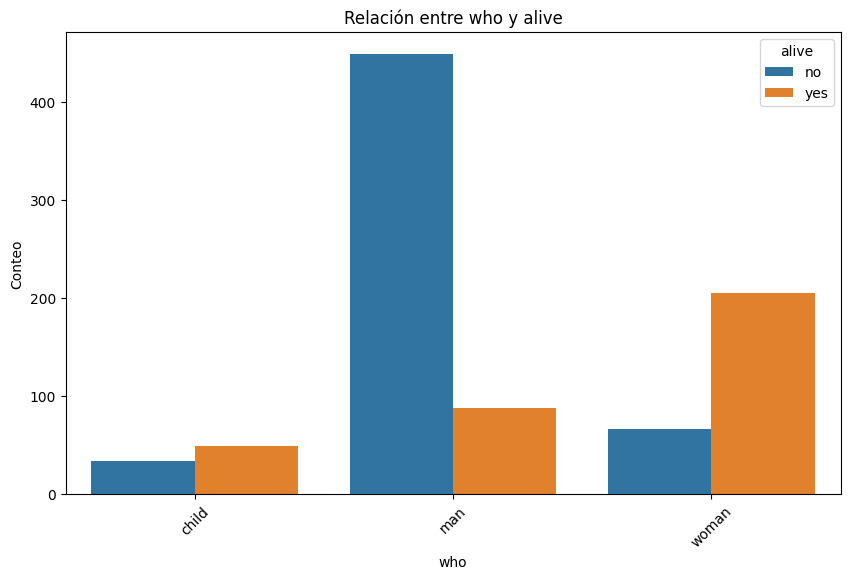

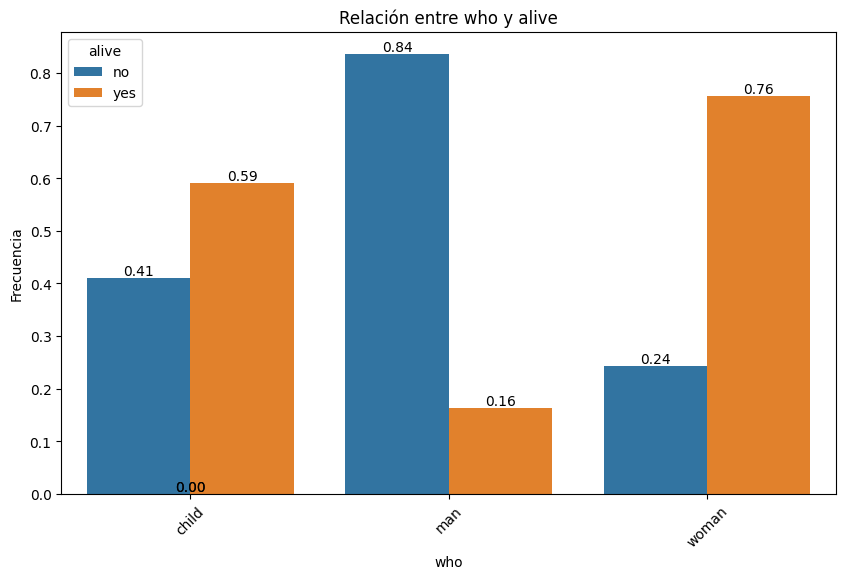

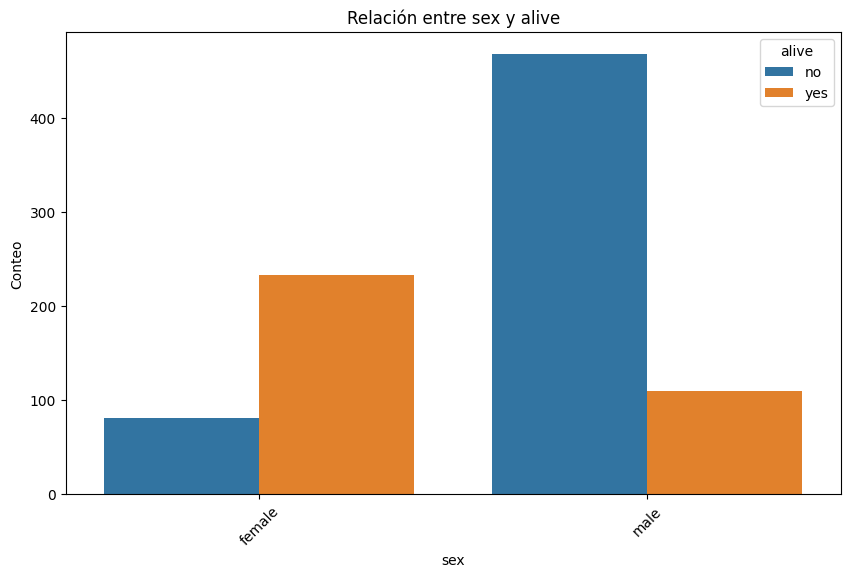

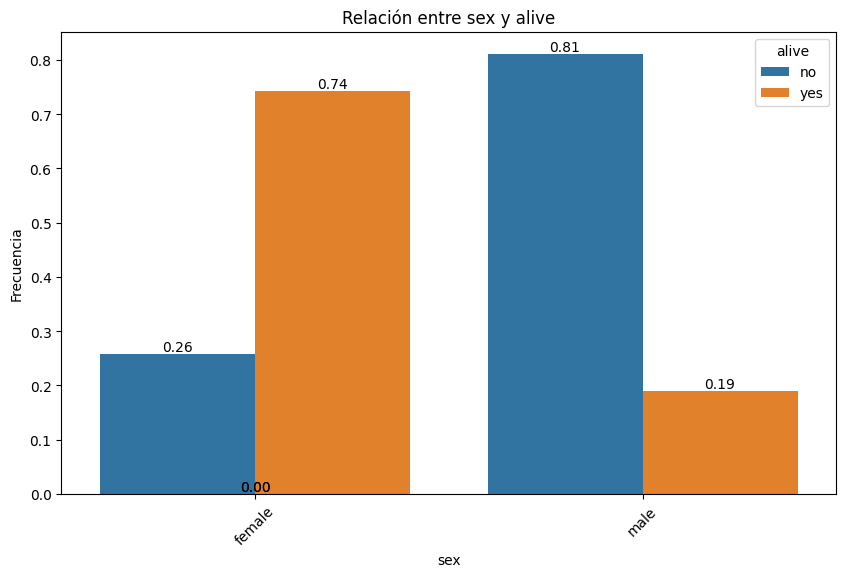

In [15]:
plot_categorical_relationship_fin(df_titanic, "who", "alive")
plot_categorical_relationship_fin(df_titanic, "who", "alive", relative_freq = True, show_values = True)
plot_categorical_relationship_fin(df_titanic, "sex", "alive")
plot_categorical_relationship_fin(df_titanic, "sex", "alive", relative_freq = True, show_values = True)

In [21]:
#¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?

chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df_titanic["sex"], df_titanic["alive"]))


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
print("\nP-Value redondeado:", p.round(3))

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]

P-Value redondeado: 0.0


In [22]:
#¿Y entre ser adulto o ser niño?
df_titanic["adultos"] = np.where(df_titanic["age"] < 18, "child", "adult")
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df_titanic["adultos"], df_titanic["alive"]))

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
print("\nP-Value redondeado:", p.round(3))

Valor Chi-Cuadrado: 12.56903165970517
P-Value: 0.00039219174140767127
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[479.37373737 298.62626263]
 [ 69.62626263  43.37373737]]

P-Value redondeado: 0.0


**2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?**

En términos absolutos, sobrevivieron más los de primera case, seguido de los de tercera y luego segunda. Sin embargo, al ver en términos relativos vemos que sobrevivieron más los de primera clase, luego segunda y por último tercera. Esta diferencia se debe a que tiene que haber una gran cantidad de tickets vendidos de tercera clase.

La clase en la que se viajaba y la supervivencia tienen una relación altísima, siendo estadísticamente significativa (p = 0.00).

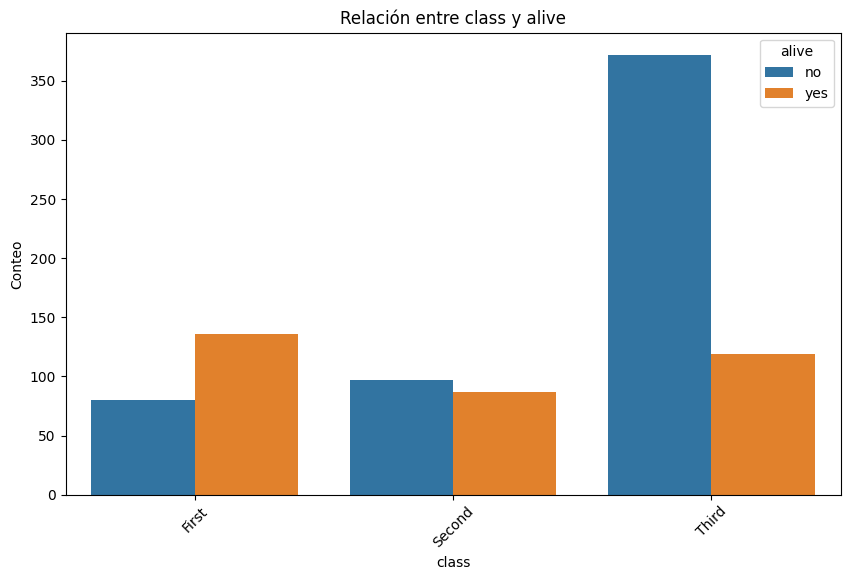

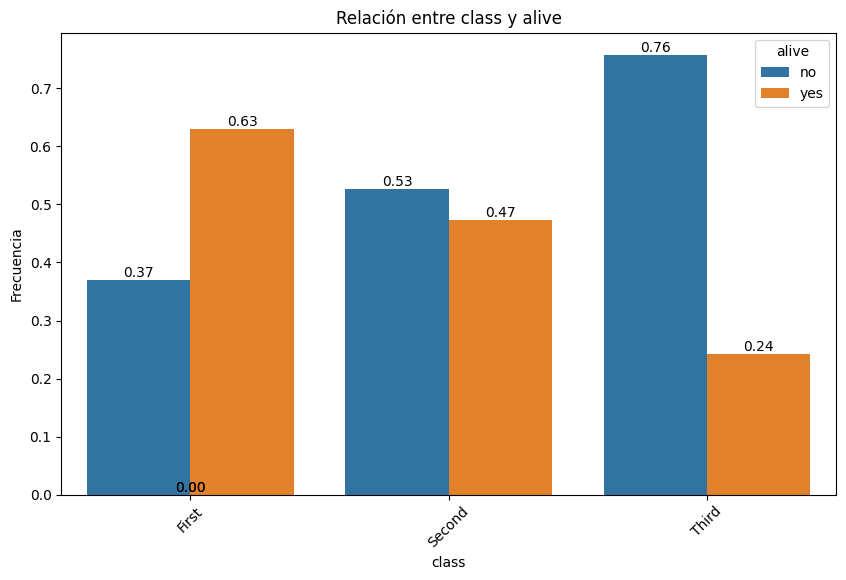

In [23]:
plot_categorical_relationship_fin(df_titanic, "class", "alive")
plot_categorical_relationship_fin(df_titanic, "class", "alive", relative_freq = True, show_values = True)

In [24]:
#¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df_titanic["class"], df_titanic["alive"]))

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
print("\nP-Value redondeado:", p.round(3))

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]

P-Value redondeado: 0.0


**3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?**

Sobrevivieron más personas que embarcaron desde Southampton en términos absolutos, al observar el porcentaje podemos ver que un 55 % de las personas que sobrevivieron embarcaron en Cherbourg.

La ciudad de embarco y el haber sobrevivido o no son dos variables estrechamente relacionadas, siendo estadísticamente significativo (p = 0.00).

In [28]:
print("---Cantidad de personas que sobrevivieron según la ciudad en la que embarcaron:---")
df_titanic[df_titanic["alive"] == "yes"]["embark_town"].value_counts()

---Cantidad de personas que sobrevivieron según la ciudad en la que embarcaron:---


embark_town
Southampton    219
Cherbourg       93
Queenstown      30
Name: count, dtype: int64

In [29]:
print("---Cantidad de personas que NO sobrevivieron según la ciudad en la que embarcaron:---")
df_titanic[df_titanic["alive"] == "no"]["embark_town"].value_counts()

---Cantidad de personas que NO sobrevivieron según la ciudad en la que embarcaron:---


embark_town
Southampton    427
Cherbourg       75
Queenstown      47
Name: count, dtype: int64

In [33]:
print("---Porcentaje de personas que sobrevivieron según la ciudad en la que embarcaron:---\n")
survival_rate_embark = df_titanic.groupby("embark_town")["alive"].apply(lambda s: (s == "yes").mean()*100)
print(survival_rate_embark)

---Porcentaje de personas que sobrevivieron según la ciudad en la que embarcaron:---

embark_town
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.900929
Name: alive, dtype: float64


In [35]:
#¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(df_titanic["embark_town"], df_titanic["alive"]))

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
print("\nP-Value redondeado:", p.round(3))

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]

P-Value redondeado: 0.0


**4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?**

Tienen una relación muy estrecha, a más precio del billete más probabilidad de que sobrevivas. Esta relación es estadísticamente significativa (p = 0.00).

In [36]:
df_titanic.groupby("alive")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
alive,,,,,,,,
no,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
yes,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


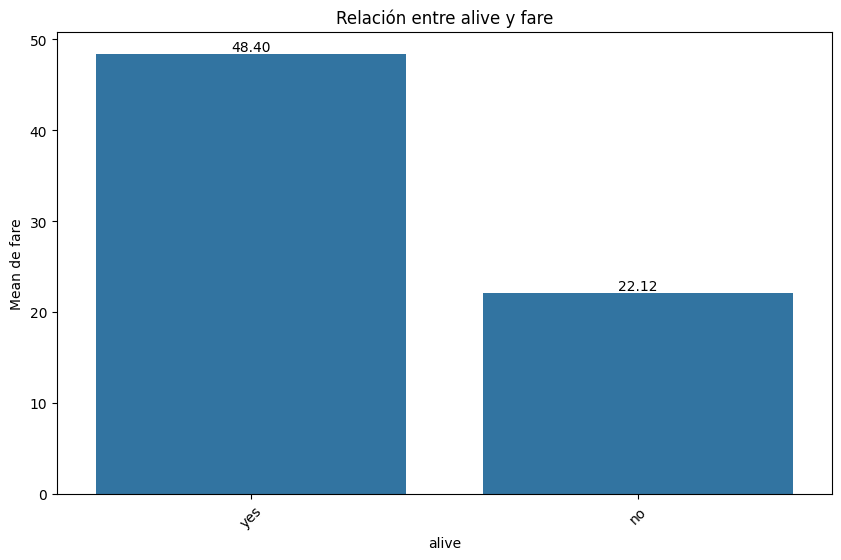

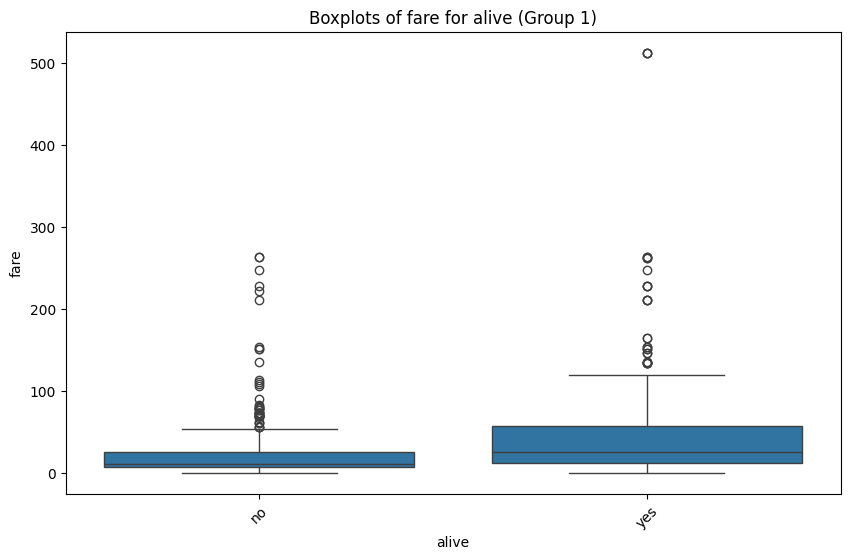

In [37]:
plot_categorical_numerical_relationship(df_titanic, "alive", "fare", measure="mean", show_values=True)
plot_grouped_boxplots(df_titanic, "alive", "fare")  # para ver la distribución

In [39]:
fare_no  = df_titanic[df_titanic["alive"] == "no"]["fare"]
fare_yes = df_titanic[df_titanic["alive"] == "yes"]["fare"]

u_stat, p_mw = stats.mannwhitneyu(fare_no, fare_yes, alternative="two-sided")
print("El estadístico U del test es: ",u_stat)
print("El p-value es: ", p_mw)
print("El p-value redondeado es: ", p_mw.round(3))


El estadístico U del test es:  57806.5
El p-value es:  4.553477179250237e-22
El p-value redondeado es:  0.0


**5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?**

Hay 15 personas que no pagaron y de esas solo una sobrevivió. Podrían ser tripulantes que no pagaron o billetes de cortesía. Si tuviese que elegir diría que tripulantes que no pagaron, porque si fuesen billetes de cortesía de gente importante (por ejemplo primera clase), esperaría que hubiesen sobrevivido más personas.

Los que más pagaron son de primera clase y las 3 personas sobrevivieron.

In [43]:
print("Cuantos no pagaron? ", df_titanic[df_titanic["fare"] == 0].shape[0])
print("Cuantos de estos sobrevivieron? \n",df_titanic[df_titanic["fare"] == 0]["alive"].value_counts())

Cuantos no pagaron?  15
Cuantos de estos sobrevivieron? 
 alive
no     14
yes     1
Name: count, dtype: int64


In [47]:
max_fare = df_titanic["fare"].max()
df_titanic[df_titanic["fare"] == max_fare]


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adultos
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,adult
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,adult
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,adult



**6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.**

Sí, parece que los de Cherbourg (que eran los que más sobrevivían) son los que más precio pagan por el billete. Hay una clara relación entre las tres variables.

In [50]:
tabla_fare = df_titanic.pivot_table(
    index="embark_town",
    columns="alive",
    values="fare",
    aggfunc="mean"
)
print(tabla_fare)


alive               no        yes
embark_town                      
Cherbourg    35.443335  79.720926
Queenstown   13.335904  13.182227
Southampton  20.743987  39.916514


**7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?**
En terminos aboslutos la franja de edad que más sobrevivió eran las personas de primera clase de entre 19-30 años.
En terminos relativos la franja de edad que más sobrevivió eran las personas de primera clase de entre 11-18 y de segunda clase entre 0-10 años.

In [56]:
df_titanic["age_group"] = pd.cut(
    df_titanic["age"],
    bins=[0, 10, 18, 30, 100],
    labels=["0-10", "11-18","19-30","40+"],
    include_lowest=True
)

grupo = df_titanic.groupby(["class", "age_group"], observed=True)["alive"].agg(
    total="count",
    survived=lambda s: (s == "yes").sum()
)

grupo["survival_rate"] = grupo["survived"] / grupo["total"] *100
print(grupo)


                  total  survived  survival_rate
class  age_group                                
First  0-10           3         2      66.666667
       11-18         13        12      92.307692
       19-30         45        32      71.111111
       40+          155        90      58.064516
Second 0-10          17        17     100.000000
       11-18         12         6      50.000000
       19-30         67        28      41.791045
       40+           88        36      40.909091
Third  0-10          44        19      43.181818
       11-18         50        14      28.000000
       19-30        158        36      22.784810
       40+          239        50      20.920502


**8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?**

Los que más pagaron tienden a estar en primera clase, embarcados sobre todo en Cherbourg y con altas tasas de supervivencia. La combinación “clase alta + billete caro” es la que mejor supervivencia tiene. Hombres adultos de 3ª clase, pagando poco son el grupo con peor supervivencia.

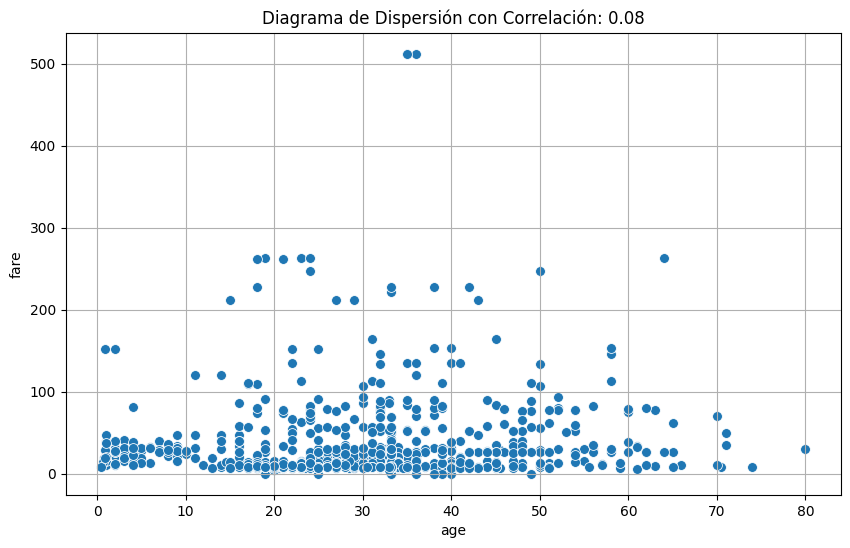

In [58]:
grafico_dispersion_con_correlacion(df_titanic, "age", "fare", mostrar_correlacion=True)

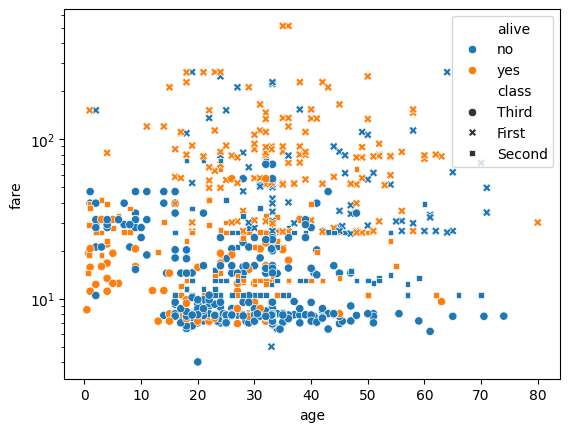

In [59]:
sns.scatterplot(data=df_titanic, x="age", y="fare", hue="alive", style="class")
plt.yscale("log")   # opcional
plt.show()

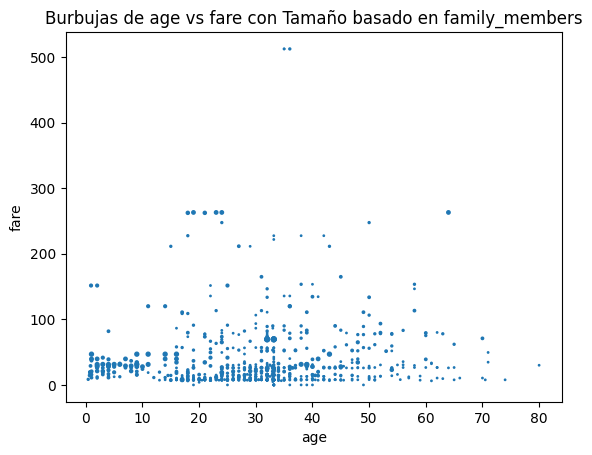

In [68]:
bubble_plot(df_titanic, "age", "fare", "family_members", scale=1)

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?